## Горохов Михаил Антонович

Группа: М8О-308Б-19

Почта: magorokhoov@gmail.com

# Лабораторная работа №0

**Цель работы:** Выбрать набор данных. Поставить задачу, которую необходимо решить с помощью эти данных. Определить что нужно получить на выходе, как это измерять, посмотреть на сами данные. Определить являются ли данные грязными или чистыми. Есть ли у данных пропуски. Как зависят между собой признаки.

**Задача:** На наборе данных о смерти из-за сердечной недостаточности подготовить данные для решения бинарной классификации вероятной смерти от признаков. С помощью датасета необходимо определить, что влияет на смерть.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

Импортируем данные

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Посмотрим на таблицу

In [3]:
data

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [4]:
data.shape

(299, 13)

Начальные данные представляют из себя 298 строк, каждая из которых содержит информацию о 13 признаках.

In [5]:
print('Признаки: {}'.format(data.columns.values))

Признаки: ['age' 'anaemia' 'creatinine_phosphokinase' 'diabetes' 'ejection_fraction'
 'high_blood_pressure' 'platelets' 'serum_creatinine' 'serum_sodium' 'sex'
 'smoking' 'time' 'DEATH_EVENT']


* age - возраст пациента

* anaemia - анемия, Снижение эритроцитов или гемоглобина (boolean)

* creatinine_phosphokinase - Уровень фермента CPK в крови (мкг/л)

* diabetes - есть ли диабет (boolean)

* ejection_fraction - Процент крови, покидающей сердце при каждом сокращении (в процентах)

* high_blood_pressure - Гипертония (boolean)

* platelets - Тромбоциты в крови (килотромбоциты/мл)

* serum_creatinine - Уровень сывороточного креатинина в крови (мг/дл)

* serum_sodium - Уровень сывороточного натрия в крови (мэкв/л)

* sex - пол пациента

* smoking - курит ли пациент (boolean)

* time - Период наблюдения (дни)

* DEATH_EVENT - умер ли пациент в течение периода наблюдения (логическое значение)

Пояснение по поводу boolean данных:

* Sex - Пол пациента Мужской = 1, Женский = 0

* Age - Возраст пациента

* Diabetes - 0 = Нет, 1 = Да

* Anaemia - 0 = Нет, 1 = Да

* high_blood_pressure — 0 = Нет, 1 = Да

* smoking - 0 = Нет, 1 = Да

* DEATH_EVENT — 0 = нет, 1 = да



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Из выведенной информации видно что датасет содержит в себе типы данных: **числовые**.

**Числовые данных** - 13 (3 - **float64**, 10 - **int64**)

In [7]:
# Количество уникальных данных для каждого признака
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [8]:
# Смотрим, повторяются ли у нас значения
print(data.duplicated().value_counts())
# Смотрим есть ли в колонках пустые данные
print(data.isnull().sum())

False    299
dtype: int64
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Мы узнали количество уникальных значений для каждого признака датасета.

Данные в датасете не повторяются (нет повторяющихся строк).

Набор данных содержит только непустые значения, поэтому нет необходимости обрабатывать отсутствующие значения.

Задачей является понять, какие призгнаки влияют на смерть пациента во время периода наблюдения. Для этого переменной target для нас будет **DEATH_EVENT**.

Посмотрим какое количество пациентов по наблюдению имеют болезнь сердца, и какое количество не имеют.

Умершие пациенты: 32.11 % (96 пациентов)
Неумершие: 67.89 % (203 пациентов)


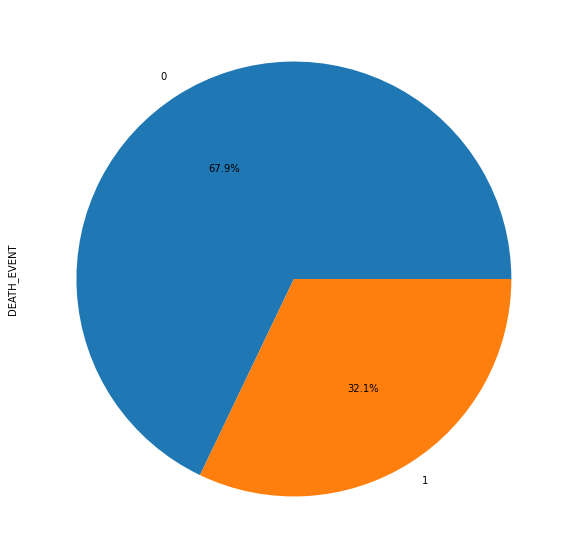

In [9]:
y = data['DEATH_EVENT']
print('Умершие пациенты: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[1]*100,2), y.value_counts()[1]))
print('Неумершие: {} % ({} пациентов)'.format(round(y.value_counts(normalize=True)[0]*100,2), y.value_counts()[0]))
plt.show(data['DEATH_EVENT'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(10,10)))

In [10]:
# Информация о данных
data.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

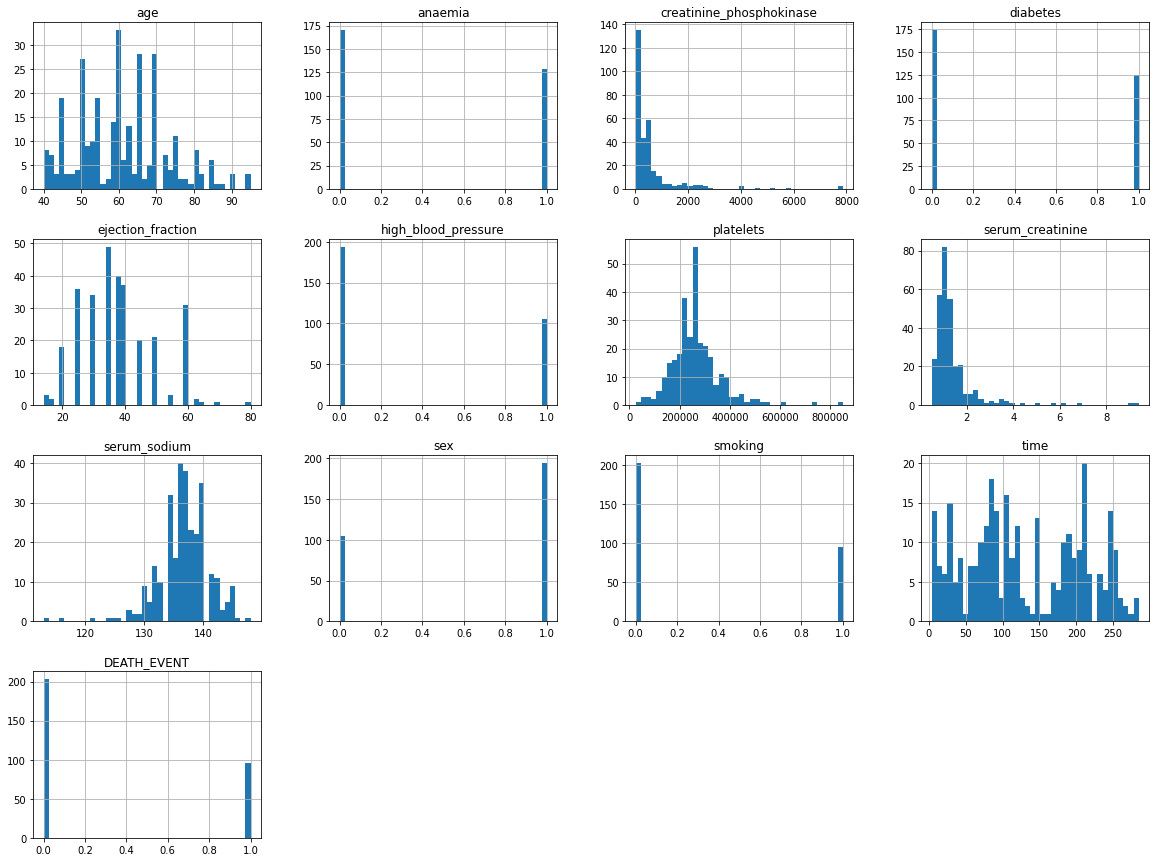

In [11]:
%matplotlib inline
data.hist(bins=40,figsize=(20,15))
plt.show()

Поищем выбросы

In [12]:
figure = px.box(data,y="age",x="DEATH_EVENT",title=f"Распределение Age")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [13]:
figure = px.box(data,y="creatinine_phosphokinase",x="DEATH_EVENT",title=f"Распределение creatinine phosphokinase",color="sex")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [14]:
figure = px.box(data,y="ejection_fraction",x="DEATH_EVENT",title=f"Распределение ejection fraction")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [15]:
figure = px.box(data,y="platelets",x="DEATH_EVENT",title=f"Распределение platelets",color="sex")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [16]:
figure = px.box(data,y="serum_creatinine",x="DEATH_EVENT",title=f"Распределение serum_creatinine")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [17]:
figure = px.box(data,y="serum_sodium",x="DEATH_EVENT",title=f"Распределение serum_sodium")
figure.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightPink')
figure.show()

In [18]:
features = data.drop(['DEATH_EVENT'], axis=1).select_dtypes('number').columns

In [19]:
features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

Для удобства выведем всё вместе

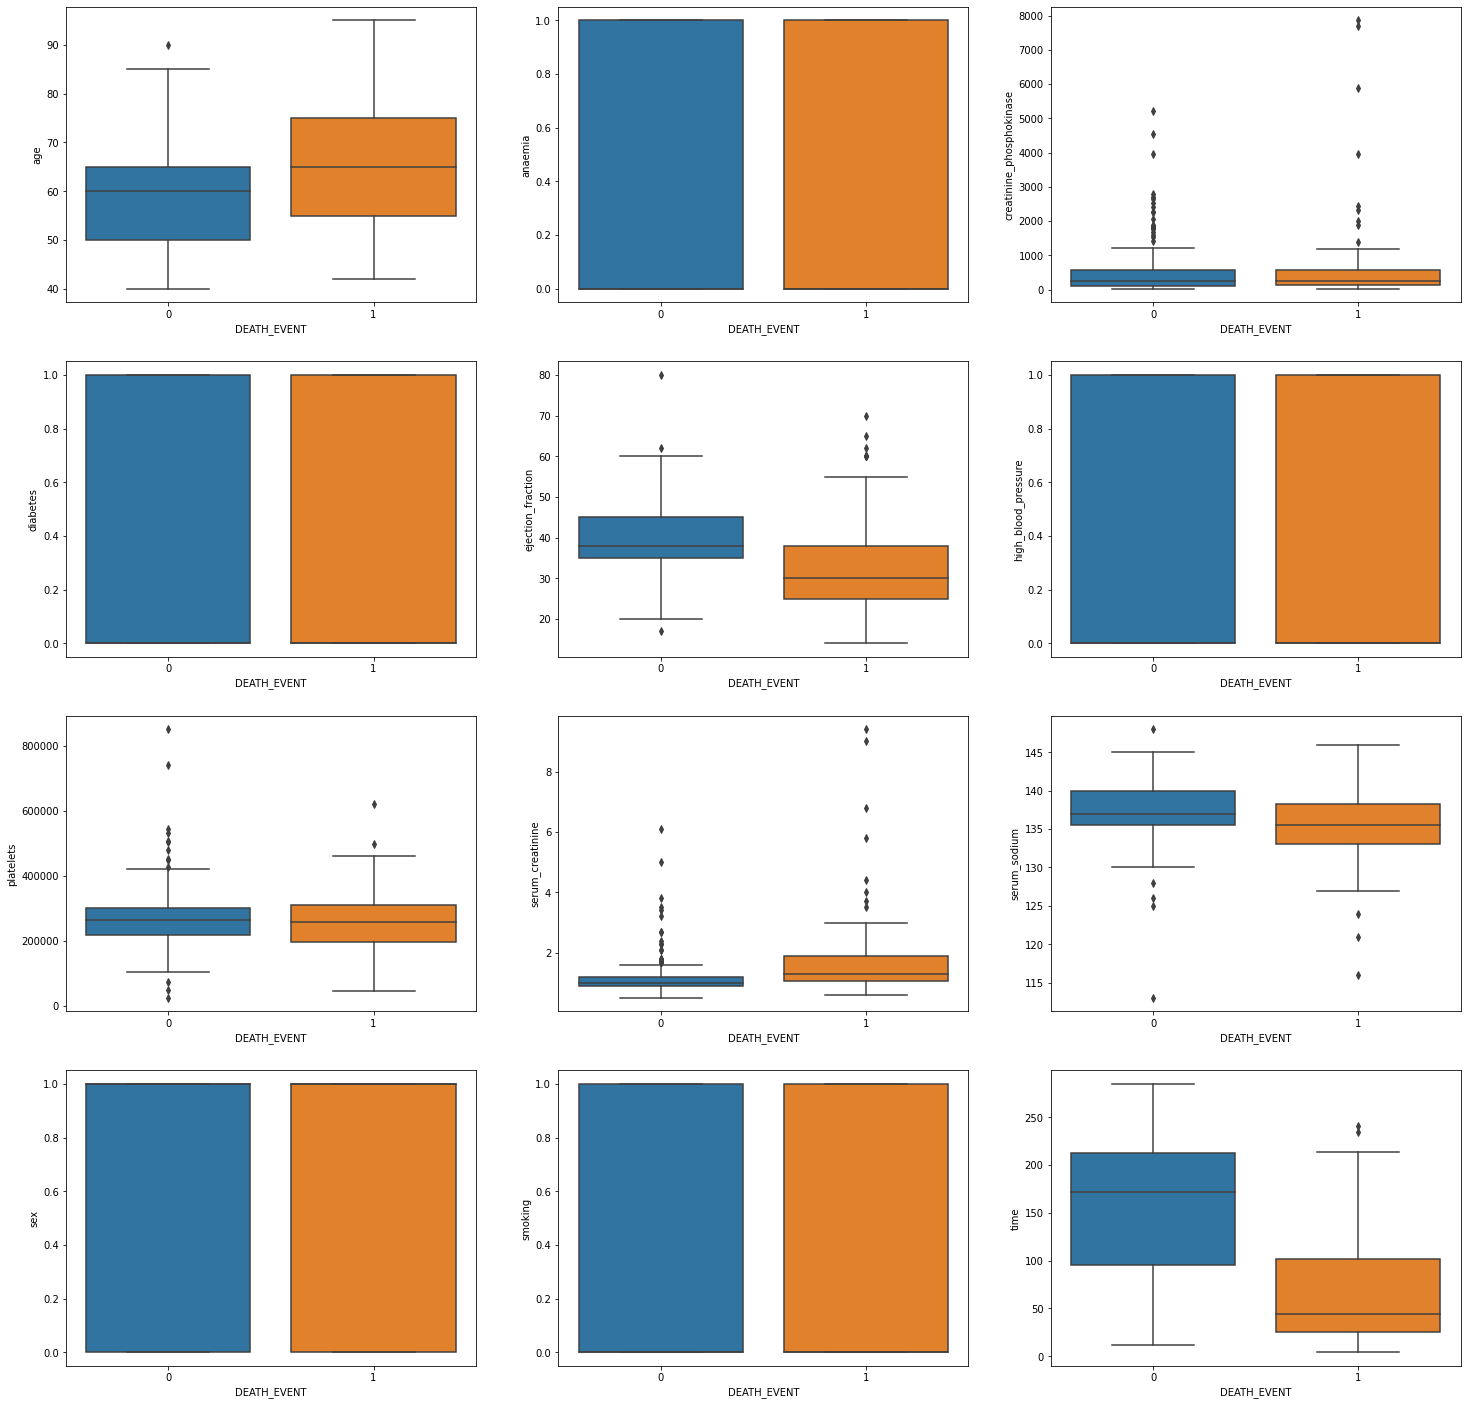

In [20]:
index = 0
plt.figure(figsize=(25,25))
for feature in features:
    if feature != "DEATH_EVENT":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='DEATH_EVENT', y=feature, data=data)

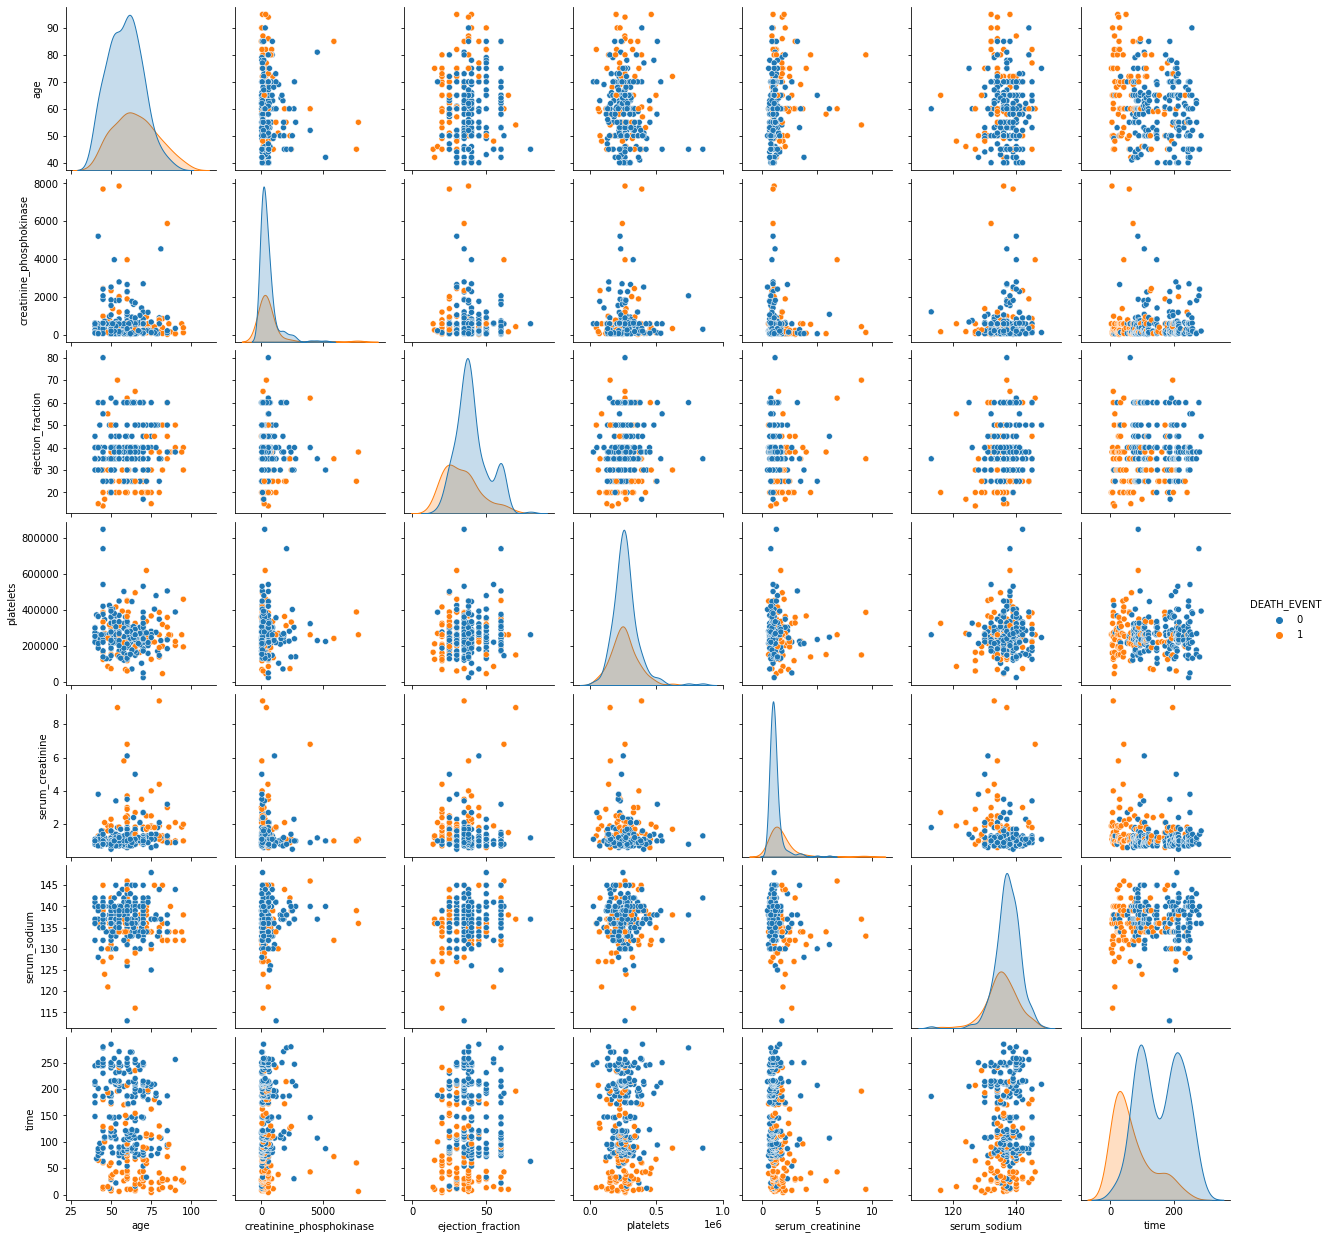

In [21]:
sns.pairplot(data.drop(['sex', 'diabetes', 'smoking', 'anaemia', 'high_blood_pressure'], axis=1), hue="DEATH_EVENT")

Выведем матрицу корреляции числовых признаков.

<AxesSubplot:title={'center':'Матрица корреляции'}>

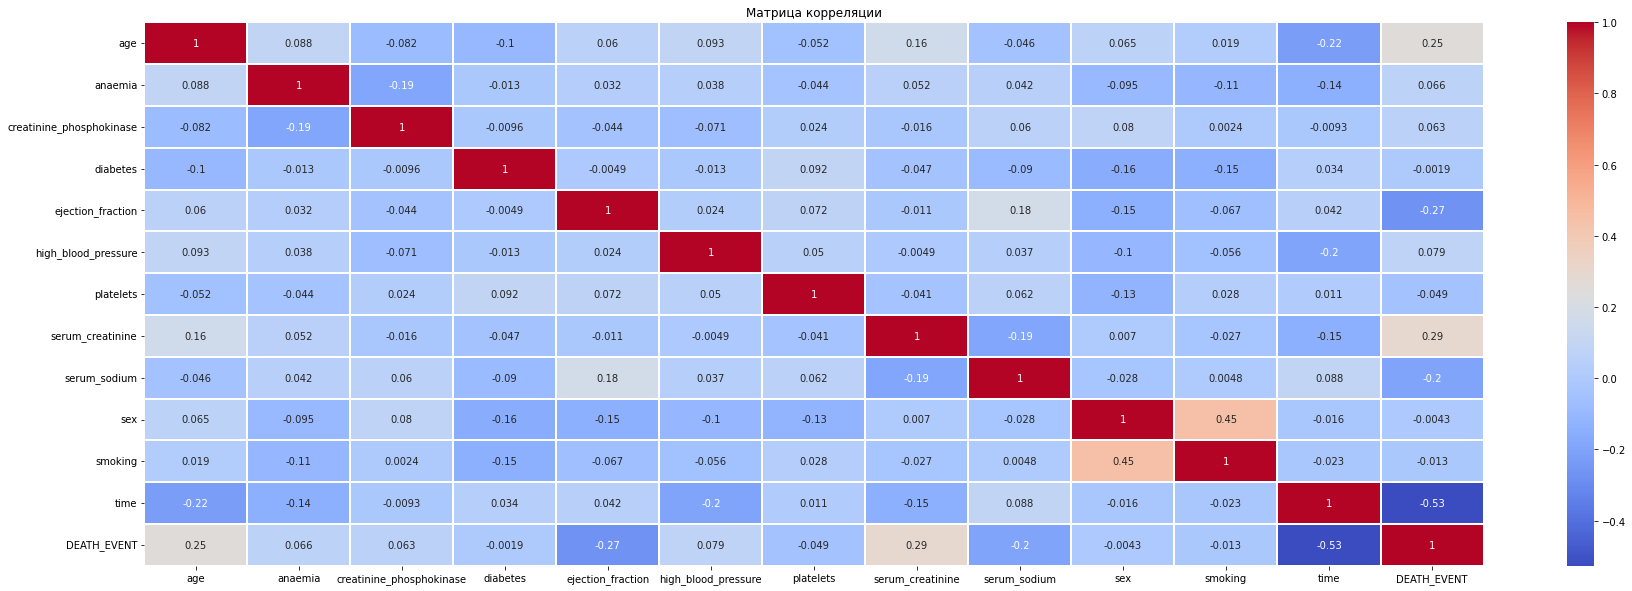

In [22]:
figure = plt.figure(figsize=(30, 10))
ax = figure.add_subplot()
ax.set_title('Матрица корреляции')

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidth=0.1)

На основе полученной корреляционной матрицы можно видеть:
* Сильная корреляция между age, serum_creatinine и DEATH_EVENT
* Положительная корреляция между anaemia, creatinine_phosphokinase, high_blood_pressure и DEATH_EVENT
* Отрицательная корреляция между ejection_fraction, platelets, serum_sodium и time имеет HeartDisease
* serum_creatinine имеет наибольшую положительную корреляцию с HeartDisease

Действительно, высокий уровень креатина свидетельствует о заболеваниях почек. Есть выражение "почки топят сердце", то есть из-за плохой работы почек слабеет сердце, из-за чего возникает преждевременная смерть.

Посмотрим ассимметрию и эксцесс.

In [23]:
skew_values = data.skew().sort_values(ascending=False)
skew_values

creatinine_phosphokinase    4.463110
serum_creatinine            4.455996
platelets                   1.462321
DEATH_EVENT                 0.770349
smoking                     0.770349
high_blood_pressure         0.626732
ejection_fraction           0.555383
age                         0.423062
diabetes                    0.333929
anaemia                     0.278261
time                        0.127803
sex                        -0.626732
serum_sodium               -1.048136
dtype: float64

Для ассиметрии нормальное распределение для числовых признаков.

In [24]:
figure = px.histogram(data, x="DEATH_EVENT", color="sex", hover_data=data.columns,
title="Распространение болезни сердца среди полов", barmode="group")
figure.show()

* Слева - количество мужчин и женщин, которые не умерли.

* Справа - количество мужчин и женщин, которые умерли.

* Заметим, что смерть не зависит от пола